In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [3]:
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [4]:
df['order_amount'].sum()

15725640

In [5]:
#Average Order Value (AOV)

In [6]:
df['order_amount'].sum()/5000

3145.128

In [7]:
df.columns

Index(['order_id', 'shop_id', 'user_id', 'order_amount', 'total_items',
       'payment_method', 'created_at'],
      dtype='object')

In [8]:
df.dtypes

order_id           int64
shop_id            int64
user_id            int64
order_amount       int64
total_items        int64
payment_method    object
created_at        object
dtype: object

In [9]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [10]:
#Changed the date column from an object type to datetime object

In [11]:
df['created_at']

0      2017-03-13 12:36:56
1      2017-03-03 17:38:52
2      2017-03-14 04:23:56
3      2017-03-26 12:43:37
4      2017-03-01 04:35:11
               ...        
4995   2017-03-30 13:47:17
4996   2017-03-16 20:36:16
4997   2017-03-19 05:42:42
4998   2017-03-16 14:51:18
4999   2017-03-18 15:48:18
Name: created_at, Length: 5000, dtype: datetime64[ns]

In [12]:
df.set_index('order_id',inplace=True)

In [13]:
df.head()

,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
1,53,746,224,2,cash,2017-03-13 12:36:56
2,92,925,90,1,cash,2017-03-03 17:38:52
3,44,861,144,1,cash,2017-03-14 04:23:56
4,18,935,156,1,credit_card,2017-03-26 12:43:37
5,18,883,156,1,credit_card,2017-03-01 04:35:11


In [14]:
df.describe()

,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.00000
mean,50.078800,849.092400,3145.128000,8.78720
std,29.006118,87.798982,41282.539349,116.32032
min,1.000000,607.000000,90.000000,1.00000
25%,24.000000,775.000000,163.000000,1.00000
50%,50.000000,849.000000,284.000000,2.00000
75%,75.000000,925.000000,390.000000,3.00000
max,100.000000,999.000000,704000.000000,2000.00000


In [15]:
#The std for the order_amount is high. 
#The outliers are increasing the standard deviation.
#This is a possible reason for the AOV being 3145.

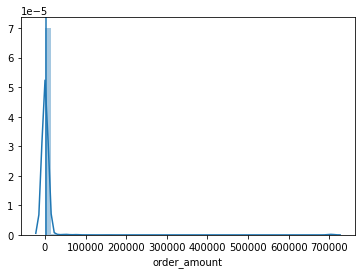

In [16]:
sns.distplot(df['order_amount'])
plt.axvline(x=np.mean(df['order_amount']))


In [17]:
#Most data points are under an order_amount of 100000

In [36]:
q1 = df['order_amount'].quantile(0.25)
q3 = df['order_amount'].quantile(0.75)
IQR = q3 - q1
print(q1)
print(q3)
print(IQR)

163.0
390.0
227.0


In [19]:
#Identifying the skew in the data. 

In [20]:
print(df['order_amount'].skew())

16.675033432503792


In [21]:
#usually the values are between -1 and +1. 16.67 indicates major skew to the right due to extreme values. 

<AxesSubplot:>

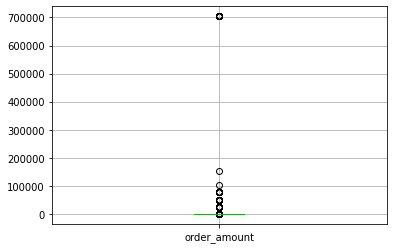

In [22]:
df.boxplot(column='order_amount')

In [30]:
#There is a cluster of points at 700000. The quartiles are not visible in this boxplot due to outliers.

In [ ]:
# One way to treat these outliers, is to floor and cap the quantiles.
# The floor is set to the 10th percentile and the cap is set to 90th percentile.

In [34]:
print(df['order_amount'].quantile(0.10))
print(df['order_amount'].quantile(0.90))

133.0
531.0


In [ ]:
#The 10th percentile is 133 and the 90th percentile is 531. The data is capped between 10th and 90th percentile.

In [25]:
df["order_amount"] = np.where(df["order_amount"] <133.0, 133.0,df['order_amount'])
df["order_amount"] = np.where(df["order_amount"] >531.0, 531.0,df['order_amount'])
print(df['order_amount'].skew())

0.4084734541629355


In [ ]:
#After flooring and capping, the new skew is 0.408. This falls within -1 and +1 indicating that the data is normally distributed.

<AxesSubplot:>

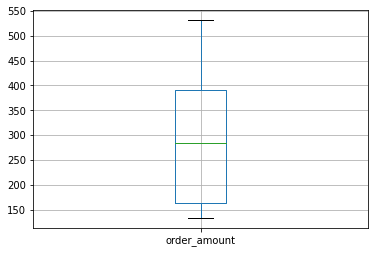

In [26]:
df.boxplot(column='order_amount')

In [35]:
q1 = df['order_amount'].quantile(0.25)
q3 = df['order_amount'].quantile(0.75)
IQR = q3 - q1
print(q1)
print(q3)
print(IQR)

163.0
390.0
227.0


In [ ]:
# The quartiles can actually be seen after treating the outliers. We still see an iqr of 227 as expected.  

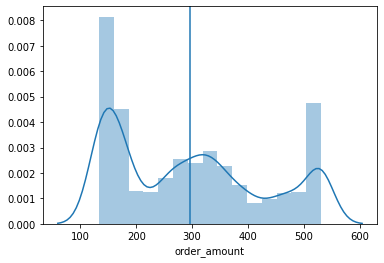

In [27]:
sns.distplot(df['order_amount'])
plt.axvline(x=np.mean(df['order_amount']))

In [28]:
df.describe()

,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.00000
mean,50.078800,849.092400,296.312600,8.78720
std,29.006118,87.798982,134.788828,116.32032
min,1.000000,607.000000,133.000000,1.00000
25%,24.000000,775.000000,163.000000,1.00000
50%,50.000000,849.000000,284.000000,2.00000
75%,75.000000,925.000000,390.000000,3.00000
max,100.000000,999.000000,531.000000,2000.00000


In [ ]:
# Average Order Value (AOV)

In [29]:
df['order_amount'].sum()/5000

296.3126

In [31]:
# The new AOV is 296.31. This is more reasonable value for a pair of shoes. 